# Project 7  - WRANGLE AND ANALYZE DATA

In [1]:
# Import relevant python libraries
import os  
import re
import numpy as np 
import pandas as pd
import tweepy
from tweepy import OAuthHandler
import requests
import json
from IPython.display import Image
from IPython.core.display import HTML

# GATHER DATA


 **As part of this project, we will gather data from 3 different sources: **
+ Download file. 
+ Programmatically download using request library.
+ Scrap data from Twitter API.

In [2]:
# Change current working directory
os.chdir('C://Users/ranjanrelan/Desktop/P7_Wrangle_Data/')

In [3]:
# Get current working directory
os.getcwd()

'C:\\Users\\ranjanrelan\\Desktop\\P7_Wrangle_Data'

#### 1. GATHER DATA - DOWNLOAD FILE MANUALLY

In [4]:
# Load WeRateDogs Twitter Archive data (data taken from Udacity)
df_1 = pd.read_csv("twitter-archive-enhanced.csv")

In [5]:
# Sanity Check : records in data frame
df_1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


##### 2. GATHER DATA - Programmatically download using Request Call 

In [6]:
# Create a new directory

folder_name = 'P7_Wrangle_Data'

if not os.path.exists(folder_name):
    os.makedirs(folder_name) 

In [7]:
# Define URL from where WeRateDogs archive file needs to be downloaded
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

# Test URL path
url

'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

In [8]:
# Download file
response = requests.get(url)


In [9]:
# Download file programmatically using the Requests library 
with open (os.path.join(folder_name,url.split('/')[-1]), mode ='wb') as file:
    file.write(response.content)

# Check if file is downloaded
os.listdir(folder_name) 

['image-predictions.tsv', 'tweet_json.txt']

In [10]:
# Create data frame from this tsv file
df_2 = pd.read_csv("P7_Wrangle_Data/image-predictions.tsv", sep ="\t")

In [11]:
# Check if data is loaded to data frame
df_2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### 3. GATHER DATA - Use API to download data

In [12]:
# The api_key, api_secret, access_token and access_token_secret are generated from twiiter account. 
api_key = "EOBTRH40v3gj1Q171QiMe15nx"

api_secret = "7b6qky97sOiLv4SYRTV9m2AnenKD1oixMws1crfh7YAXC3gwi2"   # Consumer secret: *

access_token = "847898263084773376-eLymIQsHPhQSgeNFBrTDexj9DaCmeCf"  # Access token: 

access_token_secret = "k7rsuIhtZUzWVVIaiMuOJcgjbsF8kcbITUjQEpUj5hK7h" # Access token secret: 
auth = tweepy.OAuthHandler(api_key, api_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

# Test if api is working
api


In [13]:
arr_tweet_ids = df_1.tweet_id.values # numpy array 
arr_tweet_ids

array([892420643555336193, 892177421306343426, 891815181378084864, ...,
       666033412701032449, 666029285002620928, 666020888022790149], dtype=int64)

In [289]:
import timeit

# create a list which will have list of error ids 
error_list = []

count=1
# use tweepy library to pull in twitter data 
with open('tweet_json.txt', 'w') as json_file:
    for tweet_id in arr_tweet_ids:
        start = timeit.timeit()
        
        print ("Count of record:",count) 
        print (" Tweet Id is :", tweet_id)
        count += 1
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended',wait_on_rate_limit =True,wait_on_rate_limit_notify = True)
            json.dump(tweet._json, json_file)
            json_file.write('\n')
        except tweepy.TweepError as err:
            error_list.append(err)
            
            
end = timeit.timeit()
print (end - start)
        
            
    

Count of record: 1
 Tweet Id is : 892420643555336193
Count of record: 2
 Tweet Id is : 892177421306343426
Count of record: 3
 Tweet Id is : 891815181378084864
Count of record: 4
 Tweet Id is : 891689557279858688
Count of record: 5
 Tweet Id is : 891327558926688256
Count of record: 6
 Tweet Id is : 891087950875897856
Count of record: 7
 Tweet Id is : 890971913173991426
Count of record: 8
 Tweet Id is : 890729181411237888
Count of record: 9
 Tweet Id is : 890609185150312448
Count of record: 10
 Tweet Id is : 890240255349198849
Count of record: 11
 Tweet Id is : 890006608113172480
Count of record: 12
 Tweet Id is : 889880896479866881
Count of record: 13
 Tweet Id is : 889665388333682689
Count of record: 14
 Tweet Id is : 889638837579907072
Count of record: 15
 Tweet Id is : 889531135344209921
Count of record: 16
 Tweet Id is : 889278841981685760
Count of record: 17
 Tweet Id is : 888917238123831296
Count of record: 18
 Tweet Id is : 888804989199671297
Count of record: 19
 Tweet Id is : 88

In [15]:
# Create data frame from file

df_3 = pd.DataFrame(columns=['tweet_id', 'retweet_count', 'favorite_count', 'full_text', 'created_at'])
with open('/Users/ranjanrelan/Desktop/P7_Wrangle_Data/tweet_json.txt') as file:
    for line in file:
        # load the json using json.loads 
        json_line  = json.loads(line)
        tweet_id = json_line['id_str']
        retweet_count = json_line['retweet_count']
        favorite_count = json_line['favorite_count']
        full_text = json_line['full_text'] # extra column 
        created_at = json_line['created_at'] # extra column 
        df_3 = df_3.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count, full_text, created_at]],columns=['tweet_id', 'retweet_count', 'favorite_count', 'full_text', 'created_at']))

        

        
        


In [16]:
# Check if records are populated in data frame
df_3.head()

,tweet_id,retweet_count,favorite_count,full_text,created_at
0,892420643555336193,8797.0,39367.0,This is Phineas. He's a mystical boy. Only eve...,Tue Aug 01 16:23:56 +0000 2017
0,892177421306343426,6451.0,33696.0,This is Tilly. She's just checking pup on you....,Tue Aug 01 00:17:27 +0000 2017
0,891815181378084864,4276.0,25393.0,This is Archie. He is a rare Norwegian Pouncin...,Mon Jul 31 00:18:03 +0000 2017
0,891689557279858688,8887.0,42744.0,This is Darla. She commenced a snooze mid meal...,Sun Jul 30 15:58:51 +0000 2017
0,891327558926688256,9673.0,40900.0,This is Franklin. He would like you to stop ca...,Sat Jul 29 16:00:24 +0000 2017


# ASSESSING DATA

#### Assess Data frame - 1  (Visually + Programmetically)



In [17]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [18]:
# Load 50 records of data frame 1
df_1.head(50)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [19]:
# Descriptive stats - min/max/count/std/Quantiles Q1/Q2/Q3
df_1.describe()

C:\Users\ranjanrelan\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,NaN,NaN,NaN,NaN,10.000000,10.000000
50%,7.196279e+17,NaN,NaN,NaN,NaN,11.000000,10.000000
75%,7.993373e+17,NaN,NaN,NaN,NaN,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [20]:
df_1.name.value_counts()

None            745
a                55
Charlie          12
Oliver           11
Lucy             11
Cooper           11
Penny            10
Lola             10
Tucker           10
Winston           9
Bo                9
Sadie             8
the               8
Buddy             7
Daisy             7
an                7
Toby              7
Bailey            7
Jack              6
Oscar             6
Koda              6
Milo              6
Rusty             6
Scout             6
Leo               6
Jax               6
Bella             6
Dave              6
Stanley           6
Alfie             5
               ... 
Herb              1
Livvie            1
Benny             1
Hermione          1
Rodney            1
Mairi             1
Aiden             1
Jameson           1
Stefan            1
Oddie             1
Vinnie            1
Edgar             1
Obie              1
Diogi             1
Bones             1
Pavlov            1
Skittle           1
Anna              1
Lillie            1


#### Assess Data frame - 2  (Visually + Programmetically)

In [21]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [22]:
# Load first 50 records of data frame 2
df_2.head(50)


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [23]:
# Descriptive stats - min/max/count/std/Quantiles Q1/Q2/Q3
df_2.describe()


,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [24]:
df_2.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
German_shepherd               20
Siberian_husky                20
Staffordshire_bullterrier     20
Cardigan                      19
web_site                      19
beagle                        18
Eskimo_dog                    18
Maltese_dog                   18
Shetland_sheepdog             18
teddy                         18
Lakeland_terrier              17
Shih-Tzu                      17
Rottweiler                    17
Italian_greyhound             16
kuvasz                        16
          

In [25]:
df_2.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [26]:
df_2.p2_dog.value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [27]:
df_2.p3_dog.value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

#### Assess Data frame - 3  (Visually + Programmetically)




In [28]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2348 entries, 0 to 0
Data columns (total 5 columns):
tweet_id          2348 non-null object
retweet_count     2348 non-null float64
favorite_count    2348 non-null float64
full_text         2348 non-null object
created_at        2348 non-null object
dtypes: float64(2), object(3)
memory usage: 110.1+ KB


In [29]:
# Load first 50 records of data frame 2
df_3.tail(500)

,tweet_id,retweet_count,favorite_count,full_text,created_at
0,675522403582218240,310.0,1112.0,Meet Sammy. He's a Motorola Firefox. Hat under...,Sat Dec 12 03:47:46 +0000 2015
0,675517828909424640,502.0,1401.0,12/10 stay woke https://t.co/XDiQw4Akiw,Sat Dec 12 03:29:35 +0000 2015
0,675501075957489664,6429.0,18375.0,"I shall call him squishy and he shall be mine,...",Sat Dec 12 02:23:01 +0000 2015
0,675497103322386432,1432.0,3368.0,Meet Reggie. He's going for the world record. ...,Sat Dec 12 02:07:14 +0000 2015
0,675489971617296384,666.0,1390.0,RT until we find this dog. Clearly a cool dog ...,Sat Dec 12 01:38:53 +0000 2015
0,675483430902214656,1069.0,1975.0,Rare shielded battle dog here. Very happy abou...,Sat Dec 12 01:12:54 +0000 2015
0,675432746517426176,624.0,1617.0,Happy Friday. Here's some golden puppers. 12/1...,Fri Dec 11 21:51:30 +0000 2015
0,675372240448454658,556.0,1826.0,"The tail alone is 13/10. Great dog, better own...",Fri Dec 11 17:51:04 +0000 2015
0,675362609739206656,258.0,1130.0,This is Daisy. She loves that shoe. Still no s...,Fri Dec 11 17:12:48 +0000 2015
0,675354435921575936,18841.0,34995.0,Everyone needs to watch this. 13/10 https://t....,Fri Dec 11 16:40:19 +0000 2015


In [30]:
# Descriptive stats - min/max/count/std/Quantiles Q1/Q2/Q3
df_3.describe()

,retweet_count,favorite_count
count,2348.000000,2348.000000
mean,3105.698041,8113.086031
std,5139.431454,12034.687188
min,0.000000,0.000000
25%,616.750000,1417.750000
50%,1447.500000,3591.000000
75%,3612.000000,10093.750000
max,78864.000000,131978.000000


In [31]:
df_3.retweet_count.value_counts()

612.0      6
82.0       5
395.0      5
467.0      4
291.0      4
604.0      4
3623.0     4
3864.0     4
572.0      4
384.0      4
248.0      4
1550.0     4
697.0      4
145.0      4
3234.0     4
1335.0     3
996.0      3
586.0      3
588.0      3
1069.0     3
258.0      3
262.0      3
517.0      3
264.0      3
18841.0    3
1306.0     3
1027.0     3
101.0      3
607.0      3
783.0      3
          ..
1979.0     1
223.0      1
1987.0     1
1993.0     1
14283.0    1
6101.0     1
1942.0     1
660.0      1
1857.0     1
6022.0     1
1859.0     1
1868.0     1
1869.0     1
8748.0     1
1883.0     1
1886.0     1
1888.0     1
1890.0     1
1893.0     1
1894.0     1
1896.0     1
5993.0     1
1898.0     1
1901.0     1
1905.0     1
5175.0     1
1915.0     1
1916.0     1
1922.0     1
4096.0     1
Name: retweet_count, dtype: int64

## ASSESS - DETECT AND DOCUMENT
After looking at data from 3 sources - visually  and programmatically, following  are the issues detected and documented : 
##### Quality Issues : These are the issues which happen due to missing/duplicate/incorrect/corrupted/low quality data. Following are the ones: 


##### First data frame
+ df_1: "timestamp" column's data type should be date.
+ df_1: "timestamp" column's values are suffix with +0000 (for all rows) which don't serve any prupose and should be purged.
+ df_1: "name" column header is very abstract and it could have been more descriptive.
+ df_1: "name" column has 745 "None" values which ideally should have been tagged as Null.
+ df_1: "tweet_id" column should be of string.

##### Second data frame
+ df_2: Column headers "p1","p1_conf","p1_dog","p2","p2_conf","p2_dog","p3","p3_conf","p3_dog" should be more descriptive and logical for better readability. 
+ df_2: column "tweet_id" should be string. 

##### Third data frame
+ df_3: column "tweet_id" should be string. 
+ df_3: column "retweet_count" and "favorite_count" should be integers as nobody can retweet or favorite partial tweets ! :-) 
+ df_3: "created_at" column's values are suffix with +0000 (for all rows) which don't serve any prupose and should be purged

##### Master data frame
+  deleted 3 columns under "Store" heading below as they don't have any value retweeted_status_id, retweeted_status_user_id. retweeted_status_timestamp

#### TIDINESS: Intent here is to remove messy data. 

+ Tidiness # 1 :The columns doggo, floofer, pupper and puppo just give information that whether these key words are used to address the dogs in a particular tweet. So to keep our dataset tidy we can merge them to one single column
+ Tidiness # 2 : Make a robust dataset by joining two datasets on tweet_id to have a better analysis picture #namely dataframe df_1_copy and df_3_copy






In [32]:
# Set display options so as to see complete values of columns
pd.set_option('display.max_colwidth', -1)


# CLEANING DATA

In [60]:
# Making copy of all the data frames
df_1_copy = df_1.copy()
df_2_copy = df_2.copy()
df_3_copy = df_3.copy()

### Data Cleaning Programatic Process - Define, Code & Test

#### QUALITY ISSUE # 1 



#### DEFINE
df_1_copy: "timestamp" column's values are suffix with +0000 (for all rows) which don't serve any prupose and should be purged.


#### CODE


In [61]:
df_1_copy['timestamp'] = df_1_copy['timestamp'].map(lambda x: x.rstrip('+0000'))


#### TEST


In [62]:
df_1_copy.timestamp.head(20)

0     2017-08-01 16:23:56 
1     2017-08-01 00:17:27 
2     2017-07-31 00:18:03 
3     2017-07-30 15:58:51 
4     2017-07-29 16:00:24 
5     2017-07-29 00:08:17 
6     2017-07-28 16:27:12 
7     2017-07-28 00:22:40 
8     2017-07-27 16:25:51 
9     2017-07-26 15:59:51 
10    2017-07-26 00:31:25 
11    2017-07-25 16:11:53 
12    2017-07-25 01:55:32 
13    2017-07-25 00:10:02 
14    2017-07-24 17:02:04 
15    2017-07-24 00:19:32 
16    2017-07-23 00:22:39 
17    2017-07-22 16:56:37 
18    2017-07-22 00:23:06 
19    2017-07-21 01:02:36 
Name: timestamp, dtype: object

#### QUALITY ISSUE # 2



#### DEFINE
df_1_copy: "timestamp" column's data type should be date.


#### CODE


In [63]:
df_1_copy.timestamp=df_1_copy.timestamp.astype('datetime64[ns]')


#### TEST

In [64]:
df_1_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](1





#### QUALITY ISSUE # 3



#### DEFINE
+ df_1_copy: "name" column header is very abstract and it could have been more descriptive.


#### CODE


In [65]:
df_1_copy = df_1_copy.rename(columns={'name': 'Dog_names'})

#### TEST

In [66]:
df_1_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
Dog_names                     2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](1


#### QUALITY ISSUE # 4



#### DEFINE
+ df_1_copy: "name" column has 745 "None" values which ideally should have been tagged as Null.



#### CODE


In [67]:
## clean code
df_1_copy.Dog_names.replace('None', np.nan, inplace=True)



#### TEST

In [68]:
df_1_copy.Dog_names.isnull().sum()

745


#### QUALITY ISSUE # 5



#### DEFINE
+ df_1_copy: "tweet_id" column should be string.



#### CODE


In [69]:
df_1_copy.tweet_id=df_1_copy.tweet_id.astype(str)


#### TEST

In [70]:
df_1_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
Dog_names                     1611 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](

#### QUALITY ISSUE # 6



#### DEFINE
+ df_2_copy: Column headers "p1","p1_conf","p1_dog","p2","p2_conf","p2_dog","p3","p3_conf","p3_dog" should be more descriptive and logical for better readability. 



#### CODE


In [71]:
df_2_copy = df_2_copy.rename(columns={  'p1': 'First_Prediction',
                                        'p1_conf': 'First_Predictions_Confidence',
                                        'p1_dog': 'First_Prediction_Dog_Breed',
                                        'p2': 'Second_Prediction',
                                        'p2_conf': 'Second_Predictions_Confidence',
                                        'p2_dog': 'Second_Prediction_Dog_Breed',
                                        'p3': 'Third_Prediction',
                                        'p3_conf': 'Third_Predictions_Confidence',
                                        'p3_dog': 'Third_Prediction_Dog_Breed'})



#### TEST

In [72]:
df_2_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id                         2075 non-null int64
jpg_url                          2075 non-null object
img_num                          2075 non-null int64
First_Prediction                 2075 non-null object
First_Predictions_Confidence     2075 non-null float64
First_Prediction_Dog_Breed       2075 non-null bool
Second_Prediction                2075 non-null object
Second_Predictions_Confidence    2075 non-null float64
Second_Prediction_Dog_Breed      2075 non-null bool
Third_Prediction                 2075 non-null object
Third_Predictions_Confidence     2075 non-null float64
Third_Prediction_Dog_Breed       2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### QUALITY ISSUE # 7



#### DEFINE
+ df_2_copy: column "tweet_id" should be string. 


#### CODE


In [73]:
df_2_copy.tweet_id=df_2_copy.tweet_id.astype(str)


#### TEST

In [74]:
df_2_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id                         2075 non-null object
jpg_url                          2075 non-null object
img_num                          2075 non-null int64
First_Prediction                 2075 non-null object
First_Predictions_Confidence     2075 non-null float64
First_Prediction_Dog_Breed       2075 non-null bool
Second_Prediction                2075 non-null object
Second_Predictions_Confidence    2075 non-null float64
Second_Prediction_Dog_Breed      2075 non-null bool
Third_Prediction                 2075 non-null object
Third_Predictions_Confidence     2075 non-null float64
Third_Prediction_Dog_Breed       2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


#### QUALITY ISSUE # 8



#### DEFINE
+ df_3_copy: column "tweet_id" should be string. 


#### CODE


In [75]:
df_3_copy.tweet_id=df_3_copy.tweet_id.astype(str)


#### TEST

In [76]:
df_3_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2348 entries, 0 to 0
Data columns (total 5 columns):
tweet_id          2348 non-null object
retweet_count     2348 non-null float64
favorite_count    2348 non-null float64
full_text         2348 non-null object
created_at        2348 non-null object
dtypes: float64(2), object(3)
memory usage: 110.1+ KB


#### QUALITY ISSUE # 9




#### DEFINE
+ df_3_copy: column "retweet_count" and "favorite_count" should be integers as nobody can retweet or favorite partial tweets ! :-) 



#### CODE


In [77]:
df_3_copy.retweet_count = df_3_copy.retweet_count.astype(int)
df_3_copy.favorite_count = df_3_copy.favorite_count.astype(int)

#### TEST

In [78]:
df_3_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2348 entries, 0 to 0
Data columns (total 5 columns):
tweet_id          2348 non-null object
retweet_count     2348 non-null int32
favorite_count    2348 non-null int32
full_text         2348 non-null object
created_at        2348 non-null object
dtypes: int32(2), object(3)
memory usage: 91.7+ KB


#### QUALITY ISSUE # 10 : Dropped columns retweeted_status_id , retweeted_status_id, retweeted_status_user_id under "STORE" section

#### TIDINESS ISSUE # 1



#### DEFINE
+ Tidiness # 1 :The columns doggo, floofer, pupper and puppo just give information that whether these key words are used to address the dogs in a particular tweet. So to keep our dataset tidy we can merge them to one single column




#### CODE


In [79]:
df_1_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
Dog_names                     1611 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](

In [80]:
## Using inline lambda function to merge 4 columns 'doggo','pupper',puppo' and 'floofer'.
df_1_copy['pet_names']= df_1_copy[df_1_copy.columns[13:]].apply(lambda x: ','.join(x.dropna().astype(str)),axis=1)

In [81]:
## Checking the schema of dataframe to view the anewly added column
df_1_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
Dog_names                     1611 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
pet_names              

In [82]:
# Values in the newly formed column 'pet_names' from merging 4 columns mentioned above.
df_1_copy.pet_names

0       None,None,None,None  
1       None,None,None,None  
2       None,None,None,None  
3       None,None,None,None  
4       None,None,None,None  
5       None,None,None,None  
6       None,None,None,None  
7       None,None,None,None  
8       None,None,None,None  
9       doggo,None,None,None 
10      None,None,None,None  
11      None,None,None,None  
12      None,None,None,puppo 
13      None,None,None,None  
14      None,None,None,puppo 
15      None,None,None,None  
16      None,None,None,None  
17      None,None,None,None  
18      None,None,None,None  
19      None,None,None,None  
20      None,None,None,None  
21      None,None,None,None  
22      None,None,None,None  
23      None,None,None,None  
24      None,None,None,None  
25      None,None,None,None  
26      None,None,None,None  
27      None,None,None,None  
28      None,None,None,None  
29      None,None,pupper,None
                ...          
2326    None,None,None,None  
2327    None,None,None,None  
2328    No

In [83]:
#Substituting substrings to eliminate dirty data from the new column 'pet_names'
df_1_copy['pet_names'] = df_1_copy['pet_names'].apply(lambda x: re.sub('None','',x))
df_1_copy['pet_names'] = df_1_copy['pet_names'].apply(lambda x: re.sub(',','',x))
df_1_copy.pet_names.value_counts()

                1976
pupper          245 
doggo           83  
puppo           29  
doggopupper     12  
floofer         9   
doggofloofer    1   
doggopuppo      1   
Name: pet_names, dtype: int64

In [84]:
# Dropping the 4 columns mentioned above
df_1_copy.drop(['doggo', 'puppo','floofer','pupper'], axis=1, inplace=True)


#### TEST

In [85]:
list(df_1_copy)


['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'Dog_names',
 'pet_names']

In [86]:
df_1_copy.pet_names.value_counts()

                1976
pupper          245 
doggo           83  
puppo           29  
doggopupper     12  
floofer         9   
doggofloofer    1   
doggopuppo      1   
Name: pet_names, dtype: int64

#### TIDINESS ISSUE # 2



#### DEFINE

+ Tidiness # 2 : Make a robust dataset by joining two datasets on tweet_id to have a better analysis picture #namely dataframe df_1_copy and df_3_copy



#### CODE


In [87]:
df_3_copy.reset_index(drop=True)

,tweet_id,retweet_count,favorite_count,full_text,created_at
0,892420643555336193,8797,39367,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,Tue Aug 01 16:23:56 +0000 2017
1,892177421306343426,6451,33696,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",Tue Aug 01 00:17:27 +0000 2017
2,891815181378084864,4276,25393,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,Mon Jul 31 00:18:03 +0000 2017
3,891689557279858688,8887,42744,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,Sun Jul 30 15:58:51 +0000 2017
4,891327558926688256,9673,40900,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",Sat Jul 29 16:00:24 +0000 2017
5,891087950875897856,3218,20504,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,Sat Jul 29 00:08:17 +0000 2017
6,890971913173991426,2132,12030,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,Fri Jul 28 16:27:12 +0000 2017
7,890729181411237888,19481,66538,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,Fri Jul 28 00:22:40 +0000 2017
8,890609185150312448,4373,28135,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,Thu Jul 27 16:25:51 +0000 2017
9,890240255349198849,7642,32379,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,Wed Jul 26 15:59:51 +0000 2017


In [88]:
df_master = pd.merge(df_1_copy,df_3_copy, on="tweet_id" , how="inner")
df_master_final = pd.merge(df_master,df_2_copy , on="tweet_id", how="inner")
df_master_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2069 entries, 0 to 2068
Data columns (total 29 columns):
tweet_id                         2069 non-null object
in_reply_to_status_id            23 non-null float64
in_reply_to_user_id              23 non-null float64
timestamp                        2069 non-null datetime64[ns]
source                           2069 non-null object
text                             2069 non-null object
retweeted_status_id              77 non-null float64
retweeted_status_user_id         77 non-null float64
retweeted_status_timestamp       77 non-null object
expanded_urls                    2069 non-null object
rating_numerator                 2069 non-null int64
rating_denominator               2069 non-null int64
Dog_names                        1493 non-null object
pet_names                        2069 non-null object
retweet_count                    2069 non-null int32
favorite_count                   2069 non-null int32
full_text                      

In [89]:
df_master_final.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 2069 entries, 0 to 2068
Data columns (total 29 columns):
tweet_id                         2069 non-null object
in_reply_to_status_id            23 non-null float64
in_reply_to_user_id              23 non-null float64
timestamp                        2069 non-null datetime64[ns]
source                           2069 non-null object
text                             2069 non-null object
retweeted_status_id              77 non-null float64
retweeted_status_user_id         77 non-null float64
retweeted_status_timestamp       77 non-null object
expanded_urls                    2069 non-null object
rating_numerator                 2069 non-null int64
rating_denominator               2069 non-null int64
Dog_names                        1493 non-null object
pet_names                        2069 non-null object
retweet_count                    2069 non-null int32
favorite_count                   2069 non-null int32
full_text                      

#### TEST

In [90]:
df_master_final.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2069 entries, 0 to 2068
Data columns (total 29 columns):
tweet_id                         2069 non-null object
in_reply_to_status_id            23 non-null float64
in_reply_to_user_id              23 non-null float64
timestamp                        2069 non-null datetime64[ns]
source                           2069 non-null object
text                             2069 non-null object
retweeted_status_id              77 non-null float64
retweeted_status_user_id         77 non-null float64
retweeted_status_timestamp       77 non-null object
expanded_urls                    2069 non-null object
rating_numerator                 2069 non-null int64
rating_denominator               2069 non-null int64
Dog_names                        1493 non-null object
pet_names                        2069 non-null object
retweet_count                    2069 non-null int32
favorite_count                   2069 non-null int32
full_text                      

# STORE DATA

In [91]:
# Remove Retweets 
df_master_final=df_master_final[~df_master_final['text'].str.contains("RT ")]

In [93]:
df_master_final.count()

tweet_id                         1990
in_reply_to_status_id            23  
in_reply_to_user_id              23  
timestamp                        1990
source                           1990
text                             1990
retweeted_status_id              0   
retweeted_status_user_id         0   
retweeted_status_timestamp       0   
expanded_urls                    1990
rating_numerator                 1990
rating_denominator               1990
Dog_names                        1446
pet_names                        1990
retweet_count                    1990
favorite_count                   1990
full_text                        1990
created_at                       1990
jpg_url                          1990
img_num                          1990
First_Prediction                 1990
First_Predictions_Confidence     1990
First_Prediction_Dog_Breed       1990
Second_Prediction                1990
Second_Predictions_Confidence    1990
Second_Prediction_Dog_Breed      1990
Third_Predic

In [94]:
# Drop columns retweeted_status_id ,retweeted_status_user_id ,  retweeted_status_timestamp - Quality Issue # 10 - adding here

df_master_final.drop(['retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp'], axis=1, inplace=True)

In [95]:
df_master_final.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1990 entries, 0 to 2068
Data columns (total 26 columns):
tweet_id                         1990 non-null object
in_reply_to_status_id            23 non-null float64
in_reply_to_user_id              23 non-null float64
timestamp                        1990 non-null datetime64[ns]
source                           1990 non-null object
text                             1990 non-null object
expanded_urls                    1990 non-null object
rating_numerator                 1990 non-null int64
rating_denominator               1990 non-null int64
Dog_names                        1446 non-null object
pet_names                        1990 non-null object
retweet_count                    1990 non-null int32
favorite_count                   1990 non-null int32
full_text                        1990 non-null object
created_at                       1990 non-null object
jpg_url                          1990 non-null object
img_num                    

In [97]:
# Store the master file on local system in csv format 
df_master_final.to_csv("twitter_archive_master.csv")


# ANALYZE and VISUALIZE DATA

### Top 5 retweets (with images)

In [98]:
# Top 5 retweets of all time
df_top_retweet = df_master_final.sort('retweet_count', ascending= False)
df_top_retweet = df_top_retweet.filter(['tweet_id','retweet_count','jpg_url'], axis =1)
df_top_retweet.head(5)


C:\Users\ranjanrelan\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,tweet_id,retweet_count,jpg_url
848,744234799360020481,78864,https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg
430,807106840509214720,61198,https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg
883,739238157791694849,51912,https://pbs.twimg.com/ext_tw_video_thumb/739238016737267712/pu/img/-tLpyiuIzD5zR1et.jpg
327,822872901745569793,47804,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg
59,879415818425184262,45525,https://pbs.twimg.com/ext_tw_video_thumb/879415784908390401/pu/img/cX7XI1TnUsseGET5.jpg


In [134]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url="https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg")

In [80]:
Image(url="https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg")

In [83]:
Image(url="https://pbs.twimg.com/ext_tw_video_thumb/739238016737267712/pu/img/-tLpyiuIzD5zR1et.jpg")

In [84]:
Image(url="https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg")

In [85]:
Image(url="https://pbs.twimg.com/ext_tw_video_thumb/879415784908390401/pu/img/cX7XI1TnUsseGET5.jpg")

### Top 5 favorites (with images)

In [99]:
# Top 5 favorites 
df_top_favorite = df_master_final.sort('favorite_count', ascending= False)
df_top_favorite = df_top_favorite.filter(['tweet_id','favorite_count','jpg_url'], axis =1)
df_top_favorite.head(5)

C:\Users\ranjanrelan\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,tweet_id,favorite_count,jpg_url
327,822872901745569793,131978,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg
848,744234799360020481,130264,https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg
430,807106840509214720,121103,https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg
59,879415818425184262,107497,https://pbs.twimg.com/ext_tw_video_thumb/879415784908390401/pu/img/cX7XI1TnUsseGET5.jpg
112,866450705531457537,106277,https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg


In [87]:
Image(url = "https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg")

In [88]:
Image(url="https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg")

In [89]:
Image(url="https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg")

In [90]:
Image(url="https://pbs.twimg.com/ext_tw_video_thumb/879415784908390401/pu/img/cX7XI1TnUsseGET5.jpg")

In [91]:
Image(url="https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg")

#### VISUALIZE and ANALYZE - TWEET TIME BY AUTHOR OF TWITTER ACCOUNT

In [100]:
# Extract hour when each tweet was pushed on the platform
temp_series  = (df_master_final['created_at'].str.split(':').str[0]) # pandas series
print (temp_series)

0       Tue Aug 01 16
1       Tue Aug 01 00
2       Mon Jul 31 00
3       Sun Jul 30 15
4       Sat Jul 29 16
5       Sat Jul 29 00
6       Fri Jul 28 16
7       Fri Jul 28 00
8       Thu Jul 27 16
9       Wed Jul 26 15
10      Wed Jul 26 00
11      Tue Jul 25 16
12      Tue Jul 25 01
13      Tue Jul 25 00
14      Mon Jul 24 17
15      Mon Jul 24 00
16      Sun Jul 23 00
17      Sat Jul 22 16
18      Sat Jul 22 00
19      Thu Jul 20 16
20      Wed Jul 19 16
21      Wed Jul 19 03
22      Wed Jul 19 00
23      Tue Jul 18 16
24      Tue Jul 18 00
25      Mon Jul 17 16
26      Sun Jul 16 23
27      Sun Jul 16 20
28      Sat Jul 15 23
29      Sat Jul 15 16
            ...      
2039    Tue Nov 17 00
2040    Tue Nov 17 00
2041    Mon Nov 16 23
2042    Mon Nov 16 21
2043    Mon Nov 16 21
2044    Mon Nov 16 20
2045    Mon Nov 16 20
2046    Mon Nov 16 19
2047    Mon Nov 16 16
2048    Mon Nov 16 16
2049    Mon Nov 16 15
2050    Mon Nov 16 14
2051    Mon Nov 16 04
2052    Mon Nov 16 03
2053    Mo

In [101]:
# Extract hours
tweet_hours = temp_series.str[-2:]
print (tweet_hours)


0       16
1       00
2       00
3       15
4       16
5       00
6       16
7       00
8       16
9       15
10      00
11      16
12      01
13      00
14      17
15      00
16      00
17      16
18      00
19      16
20      16
21      03
22      00
23      16
24      00
25      16
26      23
27      20
28      23
29      16
        ..
2039    00
2040    00
2041    23
2042    21
2043    21
2044    20
2045    20
2046    19
2047    16
2048    16
2049    15
2050    14
2051    04
2052    03
2053    03
2054    03
2055    02
2056    01
2057    01
2058    01
2059    01
2060    00
2061    00
2062    00
2063    00
2064    00
2065    00
2066    23
2067    23
2068    22
Name: created_at, dtype: object


In [102]:
# Inspect tweeet hours - only 5 records
tweet_hours.head()

0    16
1    00
2    00
3    15
4    16
Name: created_at, dtype: object

In [103]:
# Plot an histogram
import matplotlib.pyplot as plt

# Convert to data frame
tweet_hours = pd.DataFrame(tweet_hours)

# Drop index of data frame
tweet_hours.reset_index(drop =True)

# Assess data 
tweet_hours.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1990 entries, 0 to 2068
Data columns (total 1 columns):
created_at    1990 non-null object
dtypes: object(1)
memory usage: 31.1+ KB


In [104]:
#change the column name 
tweet_hours.columns = ['hours']

In [105]:
# convert the  hours into int type (after assessing)
tweet_hours.hours = tweet_hours.hours.astype(int)

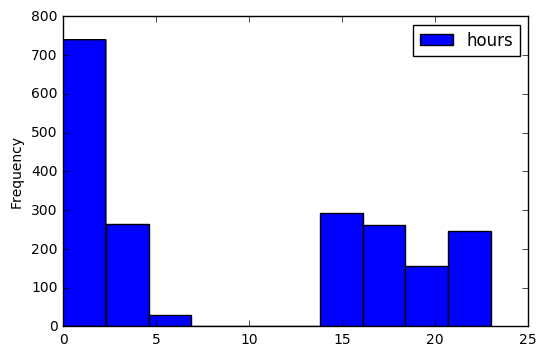

In [106]:
# plot the graph
tweet_hours.plot.hist()
plt.show()

Inference: As we could see author tweets from this account between midnight to morning 6 and from 15:30 to night.
        During office timings, i.e. from morning 7 to evening 3, tweet count is very low.
        

In [107]:
# Download this file to plot in Tableau (please see Tableau package workbook attached)
tweet_hours.to_csv("tweet_hours.csv")

### TOP 5 RATED TWEET  (with image)

In [108]:
df_top_numerator = df_master_final.sort('rating_numerator', ascending= False)
df_top_numerator = df_top_numerator.filter(['tweet_id','rating_numerator','jpg_url'], axis =1)
df_top_numerator.head(5)


C:\Users\ranjanrelan\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,tweet_id,rating_numerator,jpg_url
799,749981277374128128,1776,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg
1791,670842764863651840,420,https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg
921,731156023742988288,204,https://pbs.twimg.com/media/CiWWhVNUYAAab_r.jpg
731,758467244762497024,165,https://pbs.twimg.com/ext_tw_video_thumb/758467147756691456/pu/img/YTNzjRFDSPNXukmM.jpg
1508,677716515794329600,144,https://pbs.twimg.com/media/CWe7kw9W4AE8UJh.jpg


In [114]:

Image(url = "https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg")


In [115]:
Image(url = "https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg")


In [116]:
Image(url = "https://pbs.twimg.com/media/CiWWhVNUYAAab_r.jpg")


In [117]:
Image(url = "https://pbs.twimg.com/ext_tw_video_thumb/758467147756691456/pu/img/YTNzjRFDSPNXukmM.jpg")
    


In [118]:
Image(url = "https://pbs.twimg.com/media/CWe7kw9W4AE8UJh.jpg")